## EVALUATION NOTEBOOK - DEEP CHROMA

### Transsprition Results

In [ ]:
import matplotlib.pyplot as plt
from visualization import visualizationApp
%matplotlib inline
visualizationApp("/home/max/ET-TI/Masterarbeit/chord-recognition/results");
plt.ioff(); # interactive modoff

### Statistical Evaluation

Majmin: separation both
Wilcoxon test for paired samples
beatles: N=175 z=-4.5, p=0.000, r=0.45
rwc: N=100, z=-5.0, p=0.000, r=0.64
rw: N=61, z=-1.6, p=0.115, r=0.37
queen: N=18, z=-6.4, p=0.000, r=0.34
Sevenths: separation both
Wilcoxon test for paired samples
beatles: N=175 z=-1.1, p=0.256, r=0.11
rwc: N=100, z=-3.9, p=0.000, r=0.50
rw: N=61, z=-4.8, p=0.000, r=1.14
queen: N=18, z=-2.3, p=0.024, r=0.12


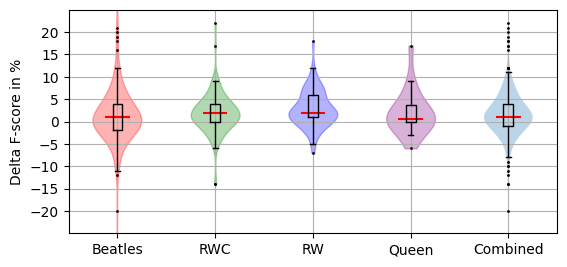

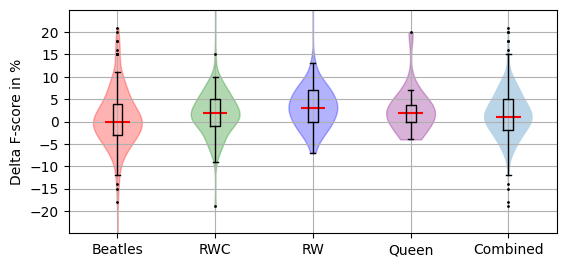

In [41]:
from visualization import load_results
import matplotlib.pyplot as plt
from dataloader import OUTLIERS
from scipy import stats
import numpy as np

def plotDeltas(delta):
        fig, ax1 = plt.subplots(figsize=(5.5, 2.5))
        parts = ax1.violinplot(delta,showmeans=False, showmedians=True,
                showextrema=False)
        bplot = ax1.boxplot(delta,
                        showfliers=True,medianprops=dict(linestyle=None,linewidth=0),
                        flierprops=dict(markerfacecolor='k', marker='o',markersize=1),
                        widths=0.1)
        parts["cmedians"].set_color("red")
        for x,color in zip(parts["bodies"],['r','g','b','purple']):
                x.set_color(color)
        xlabels = ["Beatles","RWC","RW","Queen","Combined"]
        ax1.set_yticks(np.arange(-20,25,5))
        ax1.set_ylim(-25,25)
        ax1.set_ylabel("Delta F-score in %")
        ax1.set_xticks(np.arange(1, len(xlabels) + 1), labels=xlabels)
        ax1.set_xlim(0.5, len(xlabels) + 0.5);
        ax1.grid("on")
        fig.tight_layout(pad=0.1)
        return fig

separation = "both"
data, datasets = load_results(f"/home/max/ET-TI/Masterarbeit/chord-recognition/results/source_separation_none")
data_separated, datasets = load_results(f"/home/max/ET-TI/Masterarbeit/chord-recognition/results/source_separation_{separation}")
deltas_majmin = []
deltas_sevenths = []

for dset in datasets:
        none_majmin_f =  [x.majmin_f for x in data if x.name not in OUTLIERS and x.dataset == dset]
        none_sevenths_f =  [x.sevenths_f for x in data if x.name not in OUTLIERS and x.dataset == dset]
        majmin_f =  [x.majmin_f for x in data_separated if x.name not in OUTLIERS and x.dataset == dset]
        sevenths_f =  [x.sevenths_f for x in data_separated if x.name not in OUTLIERS and x.dataset == dset]
        deltas_majmin.append([100*(x-y) for x,y in zip(majmin_f,none_majmin_f)])
        deltas_sevenths.append([100*(x-y) for x,y in zip(sevenths_f, none_sevenths_f)])

none_majmin_f =  [x.majmin_f for x in data if x.name not in OUTLIERS]
none_sevenths_f =  [x.sevenths_f for x in data if x.name not in OUTLIERS]
majmin_f =  [x.majmin_f for x in data_separated if x.name not in OUTLIERS]
sevenths_f =  [x.sevenths_f for x in data_separated if x.name not in OUTLIERS]

deltas_majmin.append([100*(x-y) for x,y in zip(majmin_f,none_majmin_f)])
deltas_sevenths.append([100*(x-y) for x,y in zip(sevenths_f, none_sevenths_f)])

fig = plotDeltas(deltas_majmin)
plt.savefig(f"/home/max/ET-TI/Masterarbeit/latex/figures/source_separation_{separation}_majmin.png")
fig = plotDeltas(deltas_sevenths)
plt.savefig(f"/home/max/ET-TI/Masterarbeit/latex/figures/source_separation_{separation}_sevenths.png")
print(f"Majmin: separation {separation}")
res_beatles = stats.wilcoxon(deltas_majmin[1],method='approx')
res_rwc = stats.wilcoxon(deltas_majmin[2],method='approx')
res_rw = stats.wilcoxon(deltas_majmin[3],method='approx')
res_queen = stats.wilcoxon(deltas_majmin[4],method='approx')
print("Wilcoxon test for paired samples")
print(f"beatles: N={len(deltas_majmin[0])} z={res_beatles.zstatistic:0.1f}, p={res_beatles.pvalue:0.3f}, r={np.abs(res_beatles.zstatistic) / np.sqrt(len(deltas_majmin[1])):0.2f}")
print(f"rwc: N={len(deltas_majmin[1])}, z={res_rwc.zstatistic:0.1f}, p={res_rwc.pvalue:0.3f}, r={np.abs(res_rwc.zstatistic) / np.sqrt(len(deltas_majmin[2])):0.2f}")
print(f"rw: N={len(deltas_majmin[2])}, z={res_rw.zstatistic:0.1f}, p={res_rw.pvalue:0.3f}, r={np.abs(res_rw.zstatistic) / np.sqrt(len(deltas_majmin[3])):0.2f}")
print(f"queen: N={len(deltas_majmin[3])}, z={res_queen.zstatistic:0.1f}, p={res_queen.pvalue:0.3f}, r={np.abs(res_queen.zstatistic) / np.sqrt(len(deltas_majmin[4])):0.2f}")

print(f"Sevenths: separation {separation}")
res_beatles = stats.wilcoxon(deltas_sevenths[0],method='approx')
res_rwc = stats.wilcoxon(deltas_sevenths[1],method='approx')
res_rw = stats.wilcoxon(deltas_sevenths[2],method='approx')
res_queen = stats.wilcoxon(deltas_sevenths[3],method='approx')
print("Wilcoxon test for paired samples")
print(f"beatles: N={len(deltas_sevenths[0])} z={res_beatles.zstatistic:0.1f}, p={res_beatles.pvalue:0.3f}, r={np.abs(res_beatles.zstatistic) / np.sqrt(len(deltas_sevenths[1])):0.2f}")
print(f"rwc: N={len(deltas_sevenths[1])}, z={res_rwc.zstatistic:0.1f}, p={res_rwc.pvalue:0.3f}, r={np.abs(res_rwc.zstatistic) / np.sqrt(len(deltas_sevenths[2])):0.2f}")
print(f"rw: N={len(deltas_sevenths[2])}, z={res_rw.zstatistic:0.1f}, p={res_rw.pvalue:0.3f}, r={np.abs(res_rw.zstatistic) / np.sqrt(len(deltas_sevenths[3])):0.2f}")
print(f"queen: N={len(deltas_sevenths[3])}, z={res_queen.zstatistic:0.1f}, p={res_queen.pvalue:0.3f}, r={np.abs(res_queen.zstatistic) / np.sqrt(len(deltas_sevenths[4])):0.2f}")


### Table of Results

In [ ]:
data, datasets = load_results(f"/home/max/ET-TI/Masterarbeit/results/median_none")

def computeStatistics(x):
    return np.median(x),np.subtract(*np.percentile(x, [75, 25]))

for name in ["none","vocals","drums","both"]:
    data, datasets = load_results(f"/home/max/ET-TI/Masterarbeit/results/median_{name}")
    print(f"\nSeparation: {name}")
    none_majmin_f =  [x.majmin_f for x in data if x.name not in OUTLIERS]
    none_sevenths_f =  [x.sevenths_f for x in data if x.name not in OUTLIERS]
    majmin_median,majmin_iqr = computeStatistics(none_majmin_f)
    sevenths_median,sevenths_iqr = computeStatistics(none_sevenths_f)
    print("combined")
    print(f"majmin: {100*majmin_median:0.1f} +- {100*majmin_iqr:0.1f}")
    print(f"sevenths: {100*sevenths_median:0.1f} +- {100*sevenths_iqr:0.1f}")
    for dset in datasets:   
        none_majmin_f =  [x.majmin_f for x in data if x.name not in OUTLIERS and x.dataset == dset]
        none_sevenths_f =  [x.sevenths_f for x in data if x.name not in OUTLIERS and x.dataset == dset]
        majmin_median,majmin_iqr = computeStatistics(none_majmin_f)
        sevenths_median,sevenths_iqr = computeStatistics(none_sevenths_f)
        print(f"{dset}")
        print(f"majmin: {100*majmin_median:0.1f} +- {100*majmin_iqr:0.1f}")
        print(f"sevenths: {100*sevenths_median:0.1f} +- {100*sevenths_iqr:0.1f}")